#CHALLENGE 8: Redes Neuronales Convolucionales (CNN)

**Estudiante: Daniel Ivan Zavaleta Guzmán**

In [ ]:
!nvidia-smi

Sun May 26 03:28:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Introducción

En este challenge, al buscar bases de datos libres dentro de Physionet, se encontró la base de datos "Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases", la cual proporciona segmentaciones manuales de corazones y pulmones para imágenes de rayos X de pecho de las bases de datos MIMIC-CXR/MIMIC-CXR-JPG y Montgomery County tuberculosis (TB) [1].

No obstante, aunque esta base de datos de Physionet proporciona segmentaciones del corazón para las 138 radiografías de tórax posteriores-anteriores de la Montgomery County TB database, este challenge no empleará las segmentaciones cardíacas de esta base de datos de Physionet. En cambio, se centrará exclusivamente en las imágenes de rayos X completas del Montgomery County TB database para realizar clasificaciones de ausencia o presencia de tuberculosis en base a radiografías de tórax [2].

La información del Montgomery County TB database se puede encontrar en: https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/index.html .


Referencias:

1. Duvieusart, B., Krones, F., Parsons, G., Tarassenko, L., Papiez, B. W., & Mahdi, A. (2023). Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases (version 1.0.0). PhysioNet. https://doi.org/10.13026/0k35-mb65.

2. Montgomery County X-ray Set, Link:
https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-rayDatasets/Montgomery-County-CXR-Set/MontgomerySet/index.html

##Importación de librerias

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Obtención de base de datos de physionet

In [3]:
#!wget -r -N -c -np https://physionet.org/files/chexmask-cxr-segmentation-data/0.4/ # todo dataset
#!wget -r -N -c -np https://physionet.org/content/chexmask-cxr-segmentation-data/0.4/OriginalResolution/ChestX-Ray8.csv

#obtencion de imagenes:
!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html

--2024-05-29 21:22:43--  https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.172.122.116, 18.172.122.129, 18.172.122.128, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.172.122.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23032 (22K) [text/html]
Saving to: ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html’

data.lhncbc.nlm.nih 100%[===================>]  22.49K  --.-KB/s    in 0s      

2024-05-29 21:22:43 (69.1 MB/s) - ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html’ saved [23032/23032]

Loading robots.txt; please ignore errors.
--2024-05-29 21:22:43--  https://data.lhncbc.nlm.nih.gov/robots.txt
Reusing existing connection to data.lhncb

In [4]:
#obtencion de descripcion de cada imagen:
!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html

--2024-05-29 21:23:43--  https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.172.122.116, 18.172.122.104, 18.172.122.129, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.172.122.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22396 (22K) [text/html]
Saving to: ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’

data.lhncbc.nlm.nih 100%[===================>]  21.87K  --.-KB/s    in 0.001s  

2024-05-29 21:23:43 (42.3 MB/s) - ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’ saved [22396/22396]

Loading robots.txt; please ignore errors.
--2024-05-29 21:23:43--  https://data.lhncbc.nlm.nih.gov/robots.txt
Reusing existi

##Análisis exploratorio de datos

Se verifica la informacion dentro de un archivo .txt

In [5]:
#path del archivo específico
file_path = '/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/MCUCXR_0001_0.txt'

# Verificar si el archivo existe
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        # Leer las líneas del archivo
        lines = file.readlines()
lines

["Patient's Sex: F \n", "Patient's Age: 027Y\n", 'normal\n']

Se observa que en los archivos .txt se encuentra información relacionada a cada imagen, correspondiente a género, edad, y descripción (normal o TB).

Se extrae en un dataframe la informacion de cada archivo .txt

In [6]:
# Ruta a la carpeta con los archivos .txt
folder_path = "/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings"

# Lista para almacenar los datos
data = []

# Recorrer los archivos en el directorio
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Construir el camino completo al archivo
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            # Leer las líneas del archivo
            lines = file.readlines()

            # Extraer la información
            gender = lines[0].strip().split(': ')[1]
            age = lines[1].strip().split(': ')[1]
            findings = lines[2].strip()

            # Extraer el ID del estudio del nombre del archivo
            study_id = filename.split('.')[0]

            # Añadir la información a la lista
            data.append({'study_id': study_id, 'age': age, 'gender': gender, 'findings': findings})

# Crear DataFrame
montgomery_metadata = pd.DataFrame(data)

# Mostrar el DataFrame
montgomery_metadata


,study_id,age,gender,findings
0,MCUCXR_0313_1,015Y,M,improvements. LUL cavity has closed.
1,MCUCXR_0103_0,032Y,M,normal
2,MCUCXR_0254_1,033Y,M,stable inactive scars in RUL; post treatment f...
3,MCUCXR_0049_0,028Y,F,normal
4,MCUCXR_0077_0,008Y,F,normal
...,...,...,...,...
133,MCUCXR_0015_0,048Y,M,normal
134,MCUCXR_0057_0,032Y,F,normal
135,MCUCXR_0102_0,045Y,M,normal
136,MCUCXR_0052_0,030Y,F,normal


Se verifica que no hay datos nulos.

In [7]:
montgomery_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  138 non-null    object
 1   age       138 non-null    object
 2   gender    138 non-null    object
 3   findings  138 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


Según la información de la BD, son 58 casos con tuberculosis, y 80 casos normales. Se procede a verificar esto.

In [8]:
# Contar las filas donde 'findings' es 'normal'
normal_count = montgomery_metadata[montgomery_metadata['findings'] == 'normal'].shape[0]

print(f"Nro de observaciones 'normal': {normal_count}")


Nro de observaciones 'normal': 80


Entonces, las descripciones de las filas donde no se tiene el término "normal", se cambian por "TB", las cuales demuestran casos con tuberculosis, mientras que el término "normal" se mantiene, ya que reflejan la ausencia de tuberculosis.

In [9]:
# Cambiar los términos en la columna 'findings'
montgomery_metadata['findings'] = montgomery_metadata['findings'].apply(lambda x: "TB" if x != 'normal' else "normal")

# Mostrar los primeros registros para verificar los cambios
montgomery_metadata.head(10)


,study_id,age,gender,findings
0,MCUCXR_0313_1,015Y,M,TB
1,MCUCXR_0103_0,032Y,M,normal
2,MCUCXR_0254_1,033Y,M,TB
3,MCUCXR_0049_0,028Y,F,normal
4,MCUCXR_0077_0,008Y,F,normal
5,MCUCXR_0140_1,034Y,M,TB
6,MCUCXR_0126_1,046Y,M,TB
7,MCUCXR_0316_1,016Y,M,TB
8,MCUCXR_0084_0,043Y,F,normal
9,MCUCXR_0334_1,024Y,M,TB


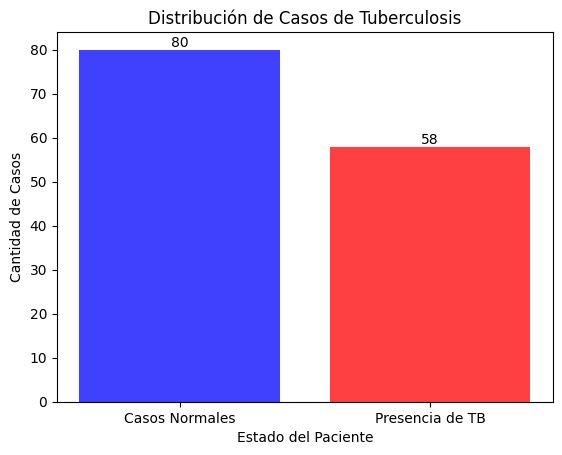

In [10]:
# Contar la cantidad de casos normales y con TB usando condiciones
count_0s = len(montgomery_metadata[montgomery_metadata['findings'] == "normal"])
count_1s = len(montgomery_metadata[montgomery_metadata['findings'] == "TB"])

# Preparar los datos para el gráfico
labels = ['Casos Normales', 'Presencia de TB']
counts = [count_0s, count_1s]

# Crear el histograma
bars = plt.bar(labels, counts, color=['blue', 'red'], alpha=0.75)

# Agregar título y etiquetas
plt.title('Distribución de Casos de Tuberculosis')
plt.xlabel('Estado del Paciente')
plt.ylabel('Cantidad de Casos')

# Añadir anotaciones con la cantidad exacta sobre cada barra
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count}', va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

Se verifica las dimensiones de cada imagen del dataset.

In [11]:
# Ruta del directorio con las imágenes
image_folder = '/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png'

# Función para obtener las dimensiones de las imágenes
def get_image_dimensions(image_folder):
    dimensions = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):  # Asegurarse de procesar solo archivos PNG
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                dimensions.append((filename, width, height))
    return dimensions

# Obtener dimensiones
image_dimensions = get_image_dimensions(image_folder)

# Mostrar las dimensiones de cada imagen
for item in image_dimensions:
    print(f"Archivo: {item[0]}, Ancho: {item[1]}, Alto: {item[2]}")


Archivo: MCUCXR_0060_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0350_1.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0099_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0331_1.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0061_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0334_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0243_1.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0223_1.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0390_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0022_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0372_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0057_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0289_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0150_1.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0082_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0016_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0028_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0041_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0097_0.png, Ancho: 4020, Alto: 4892
Archivo: MCU

##Preprocesamiento de datos

Se interrelaciona las imágenes con las etiquetas almacenadas en el dataframe

In [12]:
#se crea nueva columna en 'montgomery_metadata` tiene las columnas 'study_id' para el nombre del archivo y 'findings' para las etiquetas
montgomery_metadata['filename'] = montgomery_metadata['study_id'].apply(lambda x: f"{x}.png")
montgomery_metadata.head(5)

,study_id,age,gender,findings,filename
0,MCUCXR_0313_1,015Y,M,TB,MCUCXR_0313_1.png
1,MCUCXR_0103_0,032Y,M,normal,MCUCXR_0103_0.png
2,MCUCXR_0254_1,033Y,M,TB,MCUCXR_0254_1.png
3,MCUCXR_0049_0,028Y,F,normal,MCUCXR_0049_0.png
4,MCUCXR_0077_0,008Y,F,normal,MCUCXR_0077_0.png


Se configura el generador de imágenes para el preprocesamiento y la división en conjuntos de entrenamiento y validación.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # División del 20% para validación
)

Se crean generadores de datos

In [14]:
train_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',  # columna que contiene los nombres de archivo
    y_col='findings',  # columna que contiene las etiquetas
    target_size=(512, 512),  # Redimensionamiento de las imágenes
    batch_size=10,
    class_mode='binary',
    subset='training'  # Subconjunto para entrenamiento
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',
    y_col='findings',
    target_size=(512, 512),
    batch_size=10,
    class_mode='binary',
    subset='validation'  # Subconjunto para validación
)


Found 111 validated image filenames belonging to 2 classes.
Found 27 validated image filenames belonging to 2 classes.


In [15]:
# Verificar el número de muestras y ajustar 'steps_per_epoch'
print(f"Entrenamiento: {train_generator.samples}")
print(f"Validación: {validation_generator.samples}")

# Asegúrate de que 'steps_per_epoch' y 'validation_steps' no sean 0
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

Entrenamiento: 111
Validación: 27


In [16]:
steps_per_epoch

11

In [17]:
validation_steps

2

##Entrenamiento de modelo CNN

**Modelo sin regularización ni dropout**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


In [20]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Entrenar el modelo
modelb0 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20
11/11 [==============================] - 55s 4s/step - loss: 10.0930 - accuracy: 0.4455 - val_loss: 0.8418 - val_accuracy: 0.5500
Epoch 2/20
11/11 [==============================] - 44s 4s/step - loss: 8.4746 - accuracy: 0.5446 - val_loss: 1.5706 - val_accuracy: 0.5500
Epoch 3/20
11/11 [==============================] - 45s 4s/step - loss: 6.0919 - accuracy: 0.5050 - val_loss: 2.0665 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 46s 4s/step - loss: 4.9978 - accuracy: 0.5545 - val_loss: 2.1860 - val_accuracy: 0.5500
Epoch 5/20
11/11 [==============================] - 52s 5s/step - loss: 5.3146 - accuracy: 0.5149 - val_loss: 2.0184 - val_accuracy: 0.4500
Epoch 6/20
11/11 [==============================] - 42s 4s/step - loss: 3.3977 - accuracy: 0.5941 - val_loss: 1.6186 - val_accuracy: 0.6000
Epoch 7/20
11/11 [==============================] - 45s 4s/step - loss: 2.9926 - accuracy: 0.6040 - val_loss: 1.6420 - val_accuracy: 0.4500
Epoch 8/20
11/11 [=

##Evaluación de resultados

3/3 [==============================] - 14s 5s/step - loss: 1.3759 - accuracy: 0.5185
Loss: 1.3758528232574463
Accuracy: 0.5185185074806213


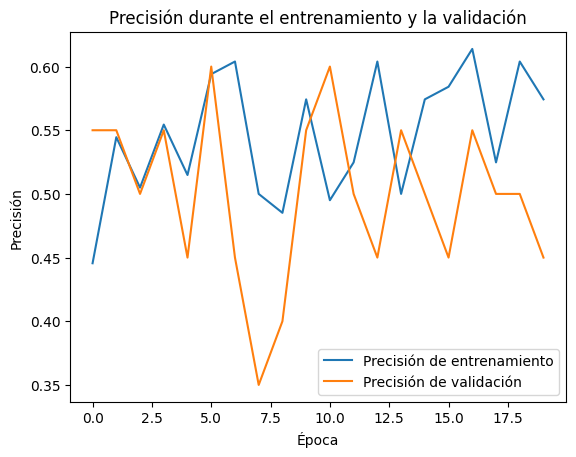

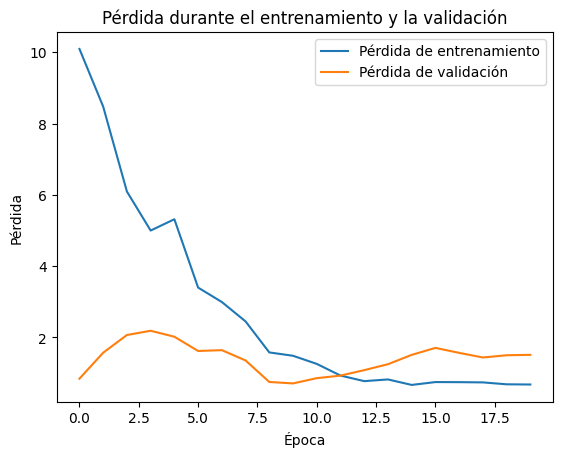

In [22]:
# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Graficar la precisión
import matplotlib.pyplot as plt

plt.plot(modelb0.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb0.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb0.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb0.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

##Entrenamiento de modelo CNN 2

Modelo CNN con una capa menos

In [23]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Entrenar el modelo
modelb2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20
11/11 [==============================] - 48s 4s/step - loss: 0.7005 - accuracy: 0.5446 - val_loss: 1.1625 - val_accuracy: 0.4500
Epoch 2/20
11/11 [==============================] - 42s 4s/step - loss: 0.6909 - accuracy: 0.5446 - val_loss: 0.8638 - val_accuracy: 0.6000
Epoch 3/20
11/11 [==============================] - 43s 4s/step - loss: 0.6691 - accuracy: 0.6535 - val_loss: 0.9420 - val_accuracy: 0.5500
Epoch 4/20
11/11 [==============================] - 44s 4s/step - loss: 0.7933 - accuracy: 0.5446 - val_loss: 1.0436 - val_accuracy: 0.6000
Epoch 5/20
11/11 [==============================] - 44s 4s/step - loss: 0.6627 - accuracy: 0.6238 - val_loss: 1.3117 - val_accuracy: 0.5500
Epoch 6/20
11/11 [==============================] - 44s 4s/step - loss: 0.6692 - accuracy: 0.6238 - val_loss: 1.0057 - val_accuracy: 0.4500
Epoch 7/20
11/11 [==============================] - 45s 4s/step - loss: 0.6926 - accuracy: 0.5743 - val_loss: 1.1957 - val_accuracy: 0.3500
Epoch 8/20
11/11 [==

##Evaluación de resultados 2

3/3 [==============================] - 8s 3s/step - loss: 0.6927 - accuracy: 0.4444
Loss: 0.6927143335342407
Accuracy: 0.4444444477558136


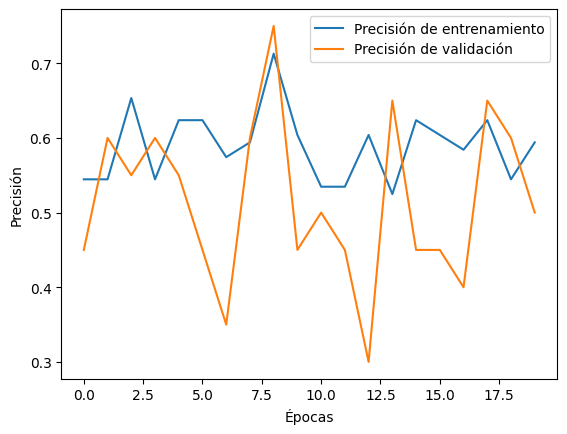

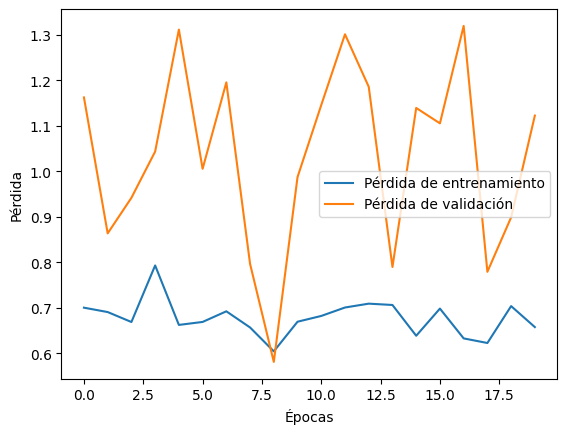

In [25]:
# Evaluar el modelo
loss, accuracy = model2.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Graficar la precisión
plt.plot(modelb2.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb2.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb2.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


##Entrenamiento de modelo CNN 3

Se configura el generador de datos con aumento de datos, y se cambia el tamaño de las imágenes de entrada a imágenes de 256x256 píxeles.


In [26]:
datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reservar el 20% de los datos para la validación
)

train_generator2 = datagen2.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',  # columna que contiene los nombres de archivo
    y_col='findings',  # columna que contiene las etiquetas
    target_size=(256, 256),  # Redimensionamiento de las imágenes
    batch_size=10,
    class_mode='binary',
    subset='training'  # Subconjunto para entrenamiento
)

validation_generator2 = datagen2.flow_from_dataframe(
    dataframe=montgomery_metadata,
    directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    x_col='filename',
    y_col='findings',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary',
    subset='validation'  # Subconjunto para validación
)

Found 111 validated image filenames belonging to 2 classes.
Found 27 validated image filenames belonging to 2 classes.


In [27]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Entrenar el modelo
modelb3 = model3.fit(
    train_generator2,
    steps_per_epoch=train_generator2.samples // train_generator2.batch_size,
    validation_data=validation_generator2,
    validation_steps=validation_generator2.samples // validation_generator2.batch_size,
    epochs=20
)


Epoch 1/20
11/11 [==============================] - 48s 4s/step - loss: 5.1041 - accuracy: 0.5050 - val_loss: 0.6736 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 39s 4s/step - loss: 4.2586 - accuracy: 0.5149 - val_loss: 1.0808 - val_accuracy: 0.5500
Epoch 3/20
11/11 [==============================] - 37s 3s/step - loss: 4.4703 - accuracy: 0.4950 - val_loss: 1.7400 - val_accuracy: 0.5500
Epoch 4/20
11/11 [==============================] - 37s 3s/step - loss: 2.9967 - accuracy: 0.5050 - val_loss: 2.4818 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 48s 5s/step - loss: 2.6601 - accuracy: 0.5149 - val_loss: 3.0313 - val_accuracy: 0.5000
Epoch 6/20
11/11 [==============================] - 41s 4s/step - loss: 2.1090 - accuracy: 0.4950 - val_loss: 4.3033 - val_accuracy: 0.4500
Epoch 7/20
11/11 [==============================] - 39s 4s/step - loss: 1.5620 - accuracy: 0.5347 - val_loss: 3.3524 - val_accuracy: 0.6000
Epoch 8/20
11/11 [==

##Evaluación de resultados 3

3/3 [==============================] - 7s 2s/step - loss: 3.8219 - accuracy: 0.5185
Loss: 3.821877956390381
Accuracy: 0.5185185074806213


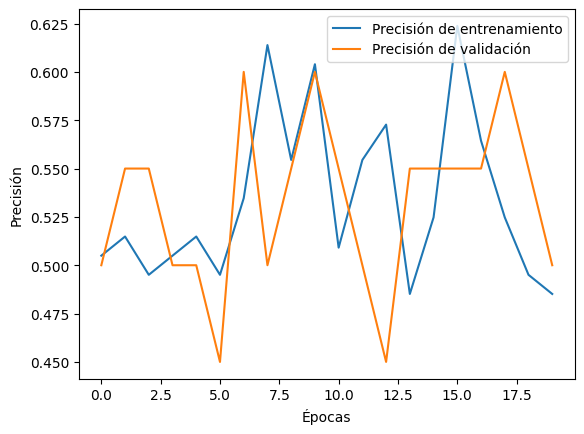

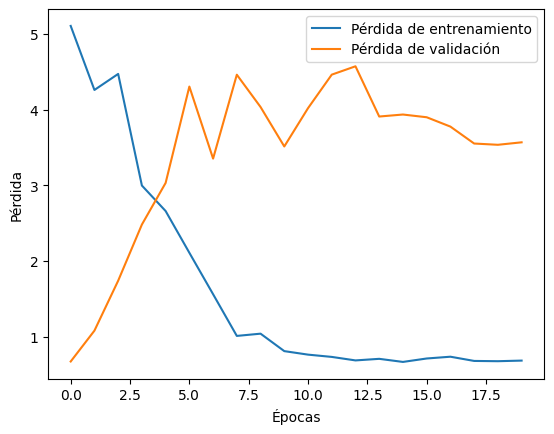

In [31]:
# Evaluar el modelo
loss, accuracy = model3.evaluate(validation_generator2)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Graficar la precisión
plt.plot(modelb3.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb3.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb3.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb3.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


##Discusión

Del primer modelo CNN al segundo (donde se quita 1 capa convolucional), se observa una disminución en la pérdida o costo, pero disminuye la precision del modelo. Se observa que en ambos modelos, la precision no llega ni al 60%, y esto puede ocurrir porque la cantidad de datos no es muy alta, o quizás sea necesario aumentar la complejidad del modelo.

En el terce modelo desarrollado, se agregan más técnicas de aumento de datos, al igual de dimensionar las imágenes que entran por el modelo a 256x256 píxeles, a diferencia de los dos anteriores modelo que empleaban imágenes de 512x512 píxeles. En este modelo, se observa que la precisión mejora ligeramente, pero aumenta la pérdida.

##Conclusiones

En este challenge, se evaluaron modelos de redes neuronales convolucionales (CNN) para la clasificación binaria de radiografías de tórax en la detección de tuberculosis (TB). A pesar de emplear diferentes cantidad de capas y técnicas de data augmentation, los resultados obtenidos (en entrenamiento y en validación) no fueron del todo óptimos.